# Maximum entropy: loaded die example

Example use of the maximum entropy package: the Unfair die example from Jaynes, *Probability Theory: The Logic of Science*, 2006.

Suppose you know that the long-run average number on the face of a 6-sided die
tossed many times is 4.5.

What probability $p(x)$ would you assign to rolling $x$ on the next roll?

This code finds the probability distribution with maximal entropy
subject to the single constraint:

1.    $E f(X) = 4.5$

where $f(x) = x$.

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import maxentropy

In [20]:
samplespace = np.arange(6) + 1

def f0(x):
    return x

# List of feature functions defined on the sample space:
f = [f0]

# Now set the desired feature expectations:
K = [4.5]

In [4]:
model = maxentropy.MinDivergenceModel(f, samplespace, verbose=True)

Computing feature 0 of 1 ...


In [5]:
model.avegtol

1e-07

In [6]:
# Fit the model
model.fit(K)

Function eval # 0
  dual is  1.791759469228055
Grad eval #0
  norm of gradient = 1.0
Function eval # 1
  dual is  1.9561933160181226
Grad eval #1
  norm of gradient = 0.9329327630717401
Function eval # 2
  dual is  1.6135882641891455
Grad eval #2
  norm of gradient = 0.005733373954516452
Function eval # 3
  dual is  1.9561933160181226
Function eval # 4
  dual is  1.6174002257495017
Grad eval #3
  norm of gradient = 0.12931954755561037
Function eval # 5
  dual is  1.613581366832318
Grad eval #4
  norm of gradient = 0.0011114941897023556
Iteration # 0
Function eval # 6
  dual is  1.613581366832318
Function eval # 7
  dual is  1.613581551211037
Grad eval #5
  norm of gradient = 0.0014426922666697095
Function eval # 8
  dual is  1.6135810981538292
Grad eval #6
  norm of gradient = 8.608225243733614e-12
Iteration # 1
Function eval # 9
  dual is  1.6135810981538292
Optimization terminated successfully.
         Current function value: 1.613581
         Iterations: 2
         Function evaluat

MinDivergenceModel(features=[<function f0 at 0x12f53fb00>],
                   samplespace=array([1, 2, 3, 4, 5, 6]), verbose=True)

In [7]:
model.params

array([0.37104894])

### Warning: The CG algorithm didn't converge.

In [10]:
# Output the distribution
print("\nFitted model parameters are:\n" + str(model.params))
print("The fitted distribution is:")
model.probdist()


Fitted model parameters are:
[0.37104894]
The fitted distribution is:


array([0.05435317, 0.07877155, 0.11415998, 0.1654468 , 0.23977444,
       0.34749407])

In [11]:
# Now show how well the constraints are satisfied:
print()
print("Desired constraints:")
print("\tE(X) = 4.5")
print()
print("Actual expectations under the fitted model:")
print("\t\\hat{X} = ", model.expectations())


Desired constraints:
	E(X) = 4.5

Actual expectations under the fitted model:
	\hat{X} =  [4.5]


In [12]:
np.allclose(K, model.expectations())

True

### Try a different algorithm: BFGS

In [13]:
model.algorithm = 'BFGS'
model.verbose = False
model.fit(K)

MinDivergenceModel(algorithm='BFGS', features=[<function f0 at 0x12f53fb00>],
                   samplespace=array([1, 2, 3, 4, 5, 6]), verbose=False)

In [14]:
np.allclose(K, model.expectations())

True

This algorithm has converged, so the constraints are satisfied.

In [15]:
model.params

array([0.37104894])

In [16]:
model.probdist()

array([0.05435317, 0.07877155, 0.11415998, 0.1654468 , 0.23977444,
       0.34749407])

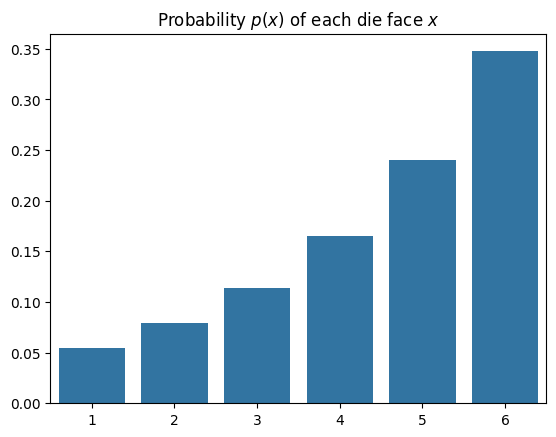

In [19]:
sns.barplot(x=np.arange(1, 7), y=model.probdist())
plt.title('Probability $p(x)$ of each die face $x$');